In [123]:
# To avoid warnings
import warnings
warnings.filterwarnings("ignore")

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

In [125]:
data=pd.read_csv("data/salary_synteticdata.csv")
data.head()

,Age,Salary
0,52,94500
1,45,82250
2,33,61250
3,47,85750
4,37,68250


In [126]:
data.shape

(1000, 2)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ef8d6c70b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef8d6c7530>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef8d6c6e40>],
 'medians': [<matplotlib.lines.Line2D at 0x1ef8d6c7aa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ef8d6c7d40>],
 'means': []}

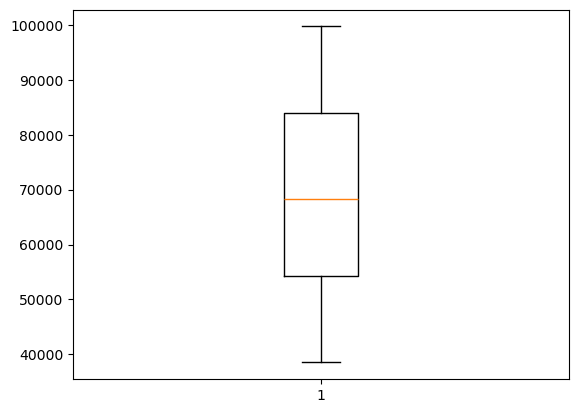

In [127]:
plt.boxplot(data['Salary']) 
#there are no outliers since the data is synthetic

{'whiskers': [<matplotlib.lines.Line2D at 0x1ef8d725d90>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef8d726180>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef8d725b50>],
 'medians': [<matplotlib.lines.Line2D at 0x1ef8d7266c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ef8d726960>],
 'means': []}

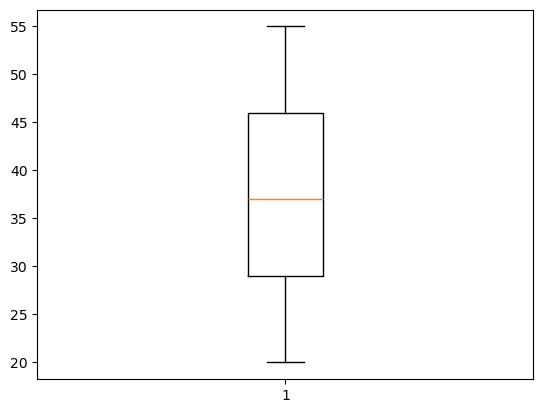

In [128]:
plt.boxplot(data['Age']) ##there are no outliers since the data is synthetic

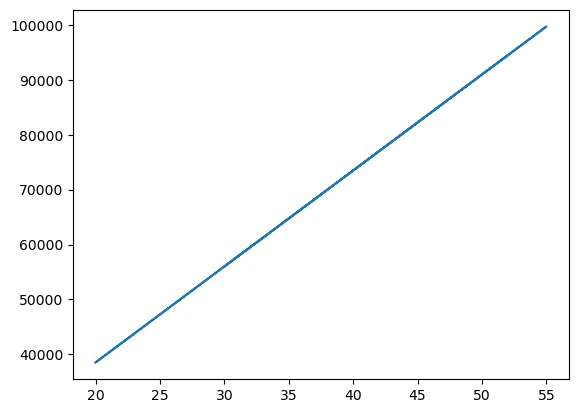

In [129]:
plt.plot(data['Age'],data['Salary']) 
#data has a good liner relationship

In [130]:
data.corr() #data has a correlation of 1

,Age,Salary
Age,1.0,1.0
Salary,1.0,1.0


### since there is no missing values and impurities no preprocessing is required.
### split the data into X and y(dependant& independant variable)
- X is the set of input variables (Age)
- y is the target variable (Salary)

In [132]:
X=data['Age']
y=data['Salary']

In [133]:
#X should be an 2Darray or dataframe , so we reshape X
X=X.values.reshape(-1, 1) 

In [134]:
X.shape

(1000, 1)

In [135]:
y.head()

0    94500
1    82250
2    61250
3    85750
4    68250
Name: Salary, dtype: int64

# split the data into train and test sets
- Train data is used for training the model
- Test data is used to test/evaluate the model

In [137]:
# train_test_split() used to split train & test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) #0.75 data will be for training,0.25 for testing.

In [138]:
X_train.shape

(750, 1)

In [139]:
X_test.shape

(250, 1)

### Use Linear Regression for modelling

In [141]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() #creating object of LinearRegression
reg.fit(X_train,y_train) #training and fitting LR object using training data

#fit command is used for training a model using train data.

LinearRegression()

In [142]:
#coeeficients of liner regression - m
reg.coef_

array([1750.])

In [143]:
#intercept of liner regression - c
reg.intercept_

3500.0000000000146

In [144]:
ypred=reg.predict(X_test)  #predicting the salary for testing data


#in this context actual value will be y_test and predicted value will be ypred..
#error is calculated in such a way that vraiation of ypred from y_test

In [145]:
ypred

array([75250., 68250., 66500., 56000., 66500., 56000., 82250., 64750.,
       71750., 61250., 78750., 94500., 85750., 54250., 42000., 47250.,
       49000., 70000., 52500., 98000., 63000., 38500., 43750., 40250.,
       77000., 56000., 52500., 59500., 52500., 87500., 64750., 49000.,
       70000., 43750., 71750., 59500., 70000., 70000., 57750., 52500.,
       94500., 42000., 52500., 43750., 71750., 64750., 54250., 43750.,
       99750., 38500., 43750., 38500., 75250., 87500., 73500., 56000.,
       57750., 40250., 50750., 49000., 78750., 64750., 91000., 78750.,
       56000., 56000., 57750., 77000., 87500., 52500., 98000., 63000.,
       42000., 40250., 57750., 75250., 47250., 75250., 85750., 85750.,
       59500., 54250., 96250., 87500., 71750., 52500., 89250., 64750.,
       59500., 96250., 56000., 61250., 42000., 54250., 70000., 71750.,
       98000., 92750., 56000., 47250., 80500., 96250., 68250., 78750.,
       84000., 64750., 82250., 99750., 71750., 87500., 91000., 70000.,
      

In [146]:
from sklearn.metrics import mean_squared_error #calculating MSE
MSE=mean_squared_error(ypred,y_test)
print("MSE:",MSE)

MSE: 2.6046263128069735e-23


In [147]:
sum((y_test-ypred)**2)/len(ypred) #this is how we can calculate MSE.

2.6046263128069735e-23

In [148]:
Results= pd.DataFrame(columns=['Actual','Predicted','Age'])
Results['Actual']=y_test
Results['Predicted']=ypred
Results['Age']=X_test
Results=Results.reset_index()
Results['Id']=Results.index
Results.head()

,index,Actual,Predicted,Age,Id
0,523,75250,75250.0,41,0
1,952,68250,68250.0,37,1
2,88,66500,66500.0,36,2
3,741,56000,56000.0,30,3
4,29,66500,66500.0,36,4


[]

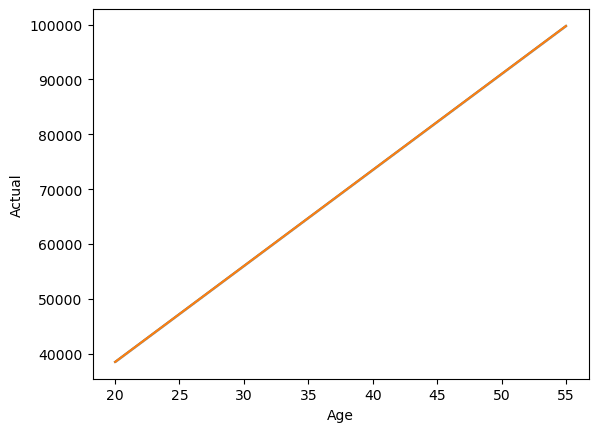

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='Age',y='Actual',data=Results)
sns.lineplot(x='Age',y='Predicted',data=Results)
plt.plot()

In [174]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, ypred)
print("R-squared:", r2)
# Calculate the R-squared value to confirm the model's goodness of fit.
# If R-squared is close to 1, this indicates a very good fit.


R-squared: 1.0
